In [1]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
myData = pd.read_excel('PATInterns2020.xlsx', sheet_name='2020_passout')
myData = myData.set_index(['Sl no'])
myData.head()

,Registration Number,Name,Degree,Course & Branch,Campus,Company,Company Type,Domain,Placement Type
Sl no,,,,,,,,,
1,14MSE0238,Ranjani R,M.Tech - 5 year intergrated,Software Engineering,Vellore,Danfoss Industries Pvt Ltd,Dream,IT,Internship
2,15MIS0001,SAITEJA CHAKRAVARTHI REDDY NALLAMILLI,M.Tech - 5 year intergrated,Software Engineering,Vellore,Vocera communications Ind Pvt Ltd,Super Dream,IT,Internship
3,15MIS0008,Divya Ganadhipalli,M.Tech - 5 year intergrated,Software Engineering,Vellore,Continental Automotive,Dream,IT,Internship
4,15MIS0010,MASANAM MAHESH POORNA,M.Tech - 5 year intergrated,Software Engineering,Vellore,Qwikcilver Solutions,Dream,IT,Internship
5,15MIS0011,VINOTH T,M.Tech - 5 year intergrated,Software Engineering,Vellore,Virtuous Transactional Analytics Pvt. Ltd. (VI...,Dream,IT,Internship


In [44]:
def VisualiseCompany(xdata, ydata, k):
    plt.figure(figsize=(10, 25))
    plt.barh(xdata, ydata)
    for index, value in enumerate(ydata):
        plt.text(value, index, str(value))
    plt.title("Number of companies recruited %s for 2020"%k)
    plt.show()

def VisualiseCompanyType(xdata, ydata, k):
    plt.figure(figsize=(10, 5))
    plt.barh(xdata, ydata)
    for index, value in enumerate(ydata):
        plt.text(value, index, str(value))
    plt.title("Types of company recruited %s for 2020"%k)
    plt.show()
    
def GenerateDataByDegree(data, degree):
    regNo = []
    name = []
    company = []
    companyType = []
    for i in range(len(data)):
        if(data.iloc[i, 2] == degree):
            regNo.append(data.iloc[i, 0])
            name.append(data.iloc[i, 1])
            company.append(data.iloc[i, 5])
            companyType.append(data.iloc[i, 6])
    mydict = {"Registration number":regNo, "Name":name, "Company":company, "Company Type":companyType}
    data = pd.DataFrame(mydict)
    return data

def GenerateDataByBranch(data, branch):
    regNo = []
    name = []
    company = []
    companyType = []
    for i in range(len(data)):
        if(data.iloc[i, 3] == branch):
            regNo.append(data.iloc[i, 0])
            name.append(data.iloc[i, 1])
            company.append(data.iloc[i, 5])
            companyType.append(data.iloc[i, 6])
    mydict = {"Registration number":regNo, "Name":name, "Company":company, "Company Type":companyType}
    data = pd.DataFrame(mydict)
    return data

def GenerateCategoryCount(newData, col):
    typeCount = []
    for t in newData[col].unique():
        typeCount.append(newData[newData[col] == t].shape[0])
    return typeCount

1. Check by course
2. Check by branch
Enter your choice: 2


1. Software Engineering
2. Bio-Technology
3. CSE with specialisation in Bioinformatics
4. Computer Science and Engineering
5. Computer Science Engineering
6. CSE with specialisation in Information Security
7. Civil Engineering
8. Chemical Engineering
9. Electronics and Communication Engineering
10. Electrical and Electronics Engineering
11. Electronics and Instrumentation Engineering
12. Mechanical Engineering (specialization in Energy Engineering)
13. ECE with specialisation in Internet of Things and Sensor
14. Information Technology
15. Electronics and Computer Engineering
16. Mechanical with specialization in  Automotive Engineering
17. Bio-Medical Engineering
18. Mechanical Engineering
19. Production and Industrial Engineering
20. CSE with specialisation in Big data
21. Control and Automation
22. Automotive Engineering - in collaboration with ARAI
23. Computer Application
24. CAD CAM
25. Communication Engineering
26. CSE 

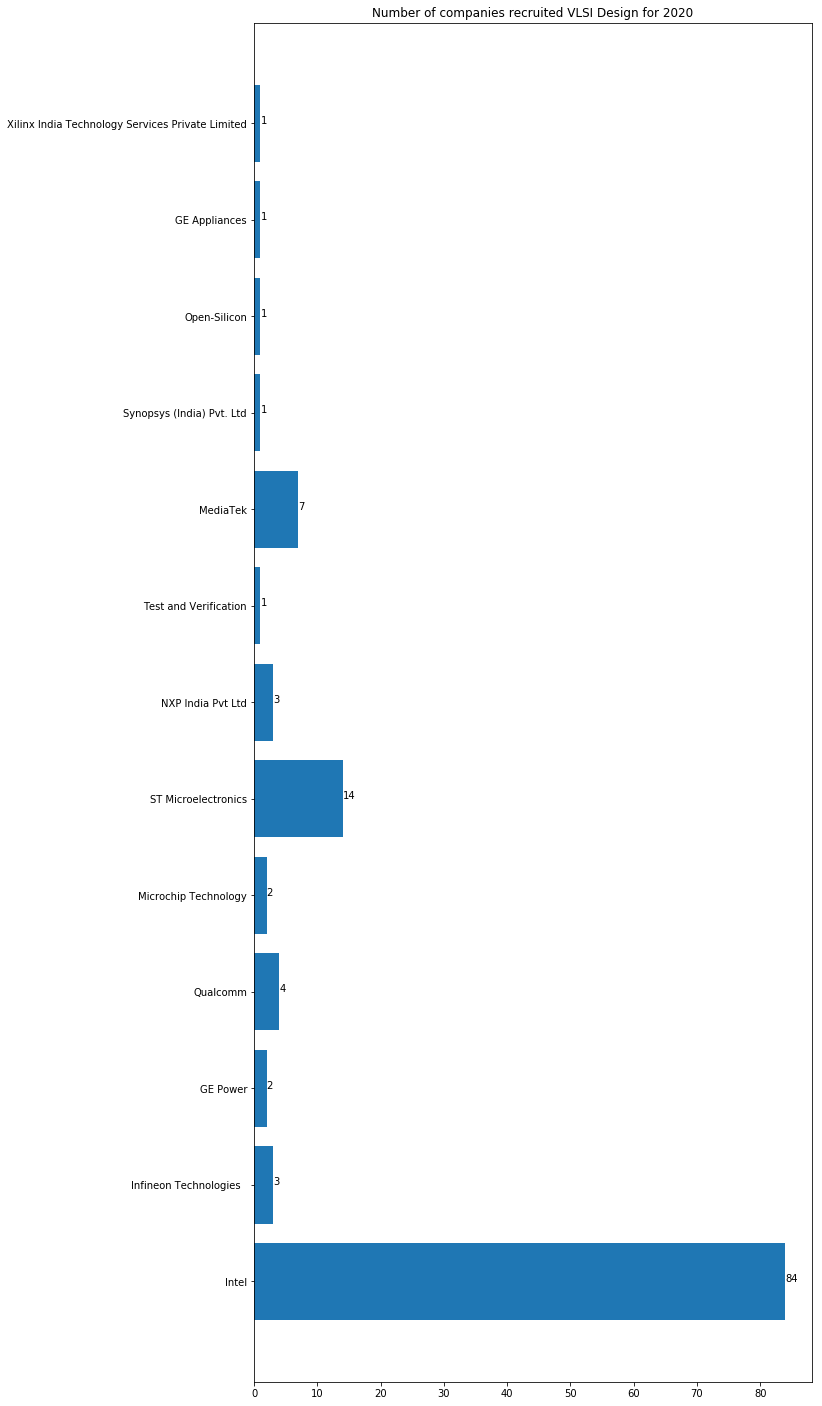

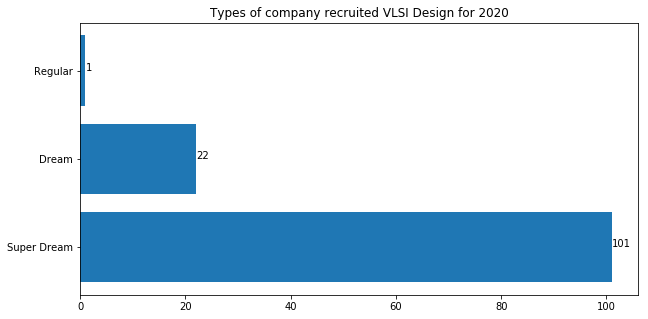

Do you wish to continue (y / n)? n


In [47]:
choice = 'yes'
while(choice in ['y', 'yes']):
    newData = myData
    print("1. Check by course\n2. Check by branch")
    val = int(input("Enter your choice: "))
    print("\n")
    i = 0
    if(val == 1):
        for item in newData['Degree'].unique():
            i = i + 1
            print(str(i) + ". " + item)
        degree = int(input("\nSelect a course: "))
        degree = newData['Degree'].unique()[degree - 1]
        newData = GenerateDataByDegree(newData, degree)
        k = degree
    elif(val == 2):
        for item in newData['Course & Branch'].unique():
            i = i + 1
            print(str(i) + ". " + item)
        branch = int(input("\nSelect a branch: "))
        branch = newData['Course & Branch'].unique()[branch - 1]
        newData = GenerateDataByBranch(newData, branch)
        k = branch
    else:
        print("\nInvalid input!")
        choice = input("Do you wish to continue (y / n)? ")
        if(choice in ['y', 'yes']):
            clear_output(wait=True)
            continue
        else:
            break
    company = newData['Company'].unique()
    companyCount = GenerateCategoryCount(newData, 'Company')
    
    companyType = newData['Company Type'].unique()
    companyTypeCount = GenerateCategoryCount(newData, 'Company Type')
    VisualiseCompany(company, companyCount, k)
    VisualiseCompanyType(companyType, companyTypeCount, k)
    choice = input("Do you wish to continue (y / n)? ")
    if(choice in ['yes', 'y']):
        clear_output(wait=True)